## ËºâÁî®Â•ó‰ª∂

In [1]:
import sys

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver import Chrome

# import re
import math
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
import time

## Ëá™Ë®ÇÂáΩÂºèÂ∫´

In [2]:
def Get_Info ( present_text = 'Please Enter Info Below', window_title = 'Login Information'):
    ModuleObj = {'Status':'fail',
                 'Custom_Err_Msg': '',
                 'uid': '',
                 'upw': '',
                 'Error': {'e_detail': '', 'e_fileName': '', 'e_lineNume': '', 'e_funcName': ''}}
    try:
        import tkinter as Tkinter
        window = Tkinter.Tk()
        window.geometry("300x200")
        window.title(window_title)
        window.rowconfigure(7, weight=1)
        window.columnconfigure(3, weight=1)
        mystring1 = Tkinter.StringVar(window)
        mystring2 = Tkinter.StringVar(window)
        def getvalue():
            window.destroy()
        def showvalue():
            if entry2.config()['show'][4] == '*':
                entry2.config(show="")
            elif entry2.config()['show'][4] == '':
                entry2.config(show="*")
        
        main_red = "#990000"
        window.config(bg=main_red, relief=Tkinter.RIDGE)
        
        frame0 = Tkinter.Frame(window, bg='black')
        frame0.pack(fill=Tkinter.X)
        Label_Main = Tkinter.Label(frame0, text = present_text, font=('Calbri', 12, 'bold'), bg='black', fg='white')
        Label_Main.config(anchor=Tkinter.CENTER)
        Label_Main.pack(side = Tkinter.TOP, padx=15, pady=4)
        # Label_Main.grid(column=0, row=0, columnspan=2)
        
        frame_Break_1 = Tkinter.Frame(window, bg=main_red)
        frame_Break_1.pack(fill=Tkinter.X)
        Label_Break_1 = Tkinter.Label(frame_Break_1, text='', bg=main_red)
        Label_Break_1.pack(expand=True)
        # Label_Break_1.grid(column=1, row=1, columnspan=3)
        
        frame1 = Tkinter.Frame(window, bg=main_red)
        frame1.pack(fill=Tkinter.X)
        Label1 = Tkinter.Label(frame1, text='Username:', width=8, bg=main_red, fg='white')
        Label1.pack(side=Tkinter.LEFT, padx=10, pady=5)
        # label1.grid(column=0, row=2)
        entry1 = Tkinter.Entry(frame1, textvariable=mystring1, relief=Tkinter.RIDGE, bd=5)
        entry1.pack(fill=Tkinter.X, padx=5)
        # entry1.grid(column=1, row=2)
        
        # frame_Break_2 = Tkinter.Frame(window, bg=main_red, height=1)
        # frame_Break_2.pack(fill=Tkinter.X)
        # Label_Break_2 = Tkinter.Label(frame_Break_2, text='', height=1, bg=main_red)
        # Label_Break_2.pack(expand=True)
        
        frame2 = Tkinter.Frame(window, bg=main_red)
        frame2.pack(fill=Tkinter.X)
        Label2 = Tkinter.Label(frame2, text='Password:', width=8, bg=main_red, fg='white')
        Label2.pack(side=Tkinter.LEFT, padx=10, pady=5)
        # label2.grid(column=0, row=4)
        entry2 = Tkinter.Entry(frame2, textvariable=mystring2, relief=Tkinter.RIDGE, bd=5, show="*")
        entry2.pack(fill=Tkinter.X, padx=5)
        # entry2.grid(column=1, row=2)
        
        # Label_Break_3 = Tkinter.Label(window, text = '') 
        # Label_Break_3.grid(column=0, row=5, columnspan=3)
        
        frame3 = Tkinter.Frame(window, bg=main_red)
        frame3.pack(fill=Tkinter.X, expand=True)
        btn_Confirm = Tkinter.Button(frame3, text='Submit', command=getvalue, bd=5, bg='#006699',  fg='white')
        btn_Confirm.pack(side=Tkinter.LEFT, padx=15, expand=True)
        btn_Cancel = Tkinter.Button(frame3, text='Check', command=showvalue, bd=5, bg='#ffcc00')
        btn_Cancel.pack(side=Tkinter.RIGHT, padx=15, expand=True)
        # btn.grid(column=0, row=6, columnspan=3)
        
        window.lift()
        window.attributes('-topmost', True)
        window.after_idle(window.attributes, '-topmost', False)
        window.mainloop()
        
        ModuleObj['uid'] = mystring1.get()
        ModuleObj['upw'] = mystring2.get()
        
        if ModuleObj['uid'] == '' or ModuleObj['upw'] == '':
            ModuleObj['Custom_Err_Msg'] = 'Data entry not correct, cannot be blank.'
            raise Exception
        
        ModuleObj['Status'] = 'success'
        return ModuleObj

    except Exception as e:
        if ModuleObj['Custom_Err_Msg'] == '':
            # ModuleObj['Custom_Err_Msg'] = str(e)
            ModuleObj['Error'] = e
        # print(ModuleObj['Custom_Err_Msg'])
        return ModuleObj

## Â∏≥ËôüÂØÜÁ¢ºËº∏ÂÖ•

In [3]:
uid1, upw1 = '', ''
if uid1 == '' or upw1 == '':
    ModuleObj =  Get_Info('Please Enter Maker Info.', 'User Information')
    if ModuleObj['Status'] == 'success':
        print('Get_Info ModuleObj = ' + ModuleObj['Status'])
        uid1 = ModuleObj['uid']
        upw1 = ModuleObj['upw']
    else:
        print('Get_Info ModuleObj = ' + ModuleObj['Status'])
        if ModuleObj['Custom_Err_Msg'] == '':
            e = ModuleObj['Error']
            Custom_Err_Msg = ErrorMessenger(e)
        else:
            Custom_Err_Msg = ModuleObj['Custom_Err_Msg']
        raise Exception

Get_Info ModuleObj = success


## Âü∑Ë°åwebdriver

In [4]:
driver = Chrome("D:\Python_Summarize\Python_Training\chromedriver.exe") #ÈñãÂïüchromeÁÄèË¶ΩÂô®
url = "https://www.facebook.com"
driver.get(url) #ÊâìÈñãÁ∂≤ÂùÄ

In [5]:
driver.find_element_by_id("email").send_keys(str(uid1))
driver.find_element_by_id("pass").send_keys(str(upw1))
driver.find_element_by_name("login").click()

In [6]:
time.sleep(5)
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//div[@aria-label='Facebook']"))) 

<selenium.webdriver.remote.webelement.WebElement (session="5a31ea0fd5b7aba58be2d384d3d171e2", element="7ffd5005-ed8d-4365-bcee-5c93d0eb767a")>

## ÂèñÂæóÊâÄÊúâÂõûÊáâ

In [7]:
#ÈÄ≤ÂÖ•Á∂≤ÂùÄ
url='https://www.facebook.com/taiwango0527/posts/4058954420897828'
driver.get(url)

In [8]:
driver.implicitly_wait(20)
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//div[@aria-label='Facebook']"))) 

<selenium.webdriver.remote.webelement.WebElement (session="5a31ea0fd5b7aba58be2d384d3d171e2", element="82608023-2203-42be-9c8e-c7e683ad6b47")>

#### Run All Above

In [9]:
time.sleep(5)

#### Run All Below

In [10]:
driver.implicitly_wait(20)
while True:
    try:
        elements = driver.find_elements_by_tag_name('span')
        for element in elements:
            # print(element.text)
            if element.text.strip() == 'ÊúÄÁõ∏Èóú':
                #element.click()
                driver.execute_script("arguments[0].click();", element)
                second_elements = element.find_elements_by_xpath("//div[@role='menuitem']")
                #second_elements[2].click()
                driver.execute_script("arguments[0].click();", second_elements[2])
        break
    except KeyboardInterrupt:
        print('KeyboardInterrupt')
        sys.exit()
    except: 
        print('continue')
        continue

continue
continue


In [11]:
driver.implicitly_wait(20)
article = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//div[@aria-posinset='1']"))) 
print(article)

<selenium.webdriver.remote.webelement.WebElement (session="5a31ea0fd5b7aba58be2d384d3d171e2", element="fa6107fd-cdae-4859-a15a-4716d9185164")>


In [13]:
# Êåâ„ÄåÊü•ÁúãÊõ¥Â§öÁïôË®Ä„Äç
while True:
    try:
        elements = article.find_elements_by_tag_name('span')
        for element in elements:
            print(element.text)
            if element.text.strip() == 'Êü•ÁúãÊõ¥Â§öÁïôË®Ä': driver.execute_script("arguments[0].click();", element)
            elif ('Ê™¢Ë¶ñÂè¶' in element.text.strip()) and ('ÂâáÁïôË®Ä' in element.text.strip()): driver.execute_script("arguments[0].click();", element)
        break
    except KeyboardInterrupt:
        print('KeyboardInterrupt')
        sys.exit()
    except: 
        print('continue')
        continue



ÊûóÊô∫Â†Ö 
ÊûóÊô∫Â†Ö
ÊûóÊô∫Â†Ö
 


5 Â∞èÊôÇ
  ¬∑
5 Â∞èÊôÇ
  ¬∑




5 Â∞èÊôÇ
5 Â∞èÊôÇ
5 Â∞èÊôÇ
5 Â∞èÊôÇ

  ¬∑
  ¬∑
 
¬∑



„ÄêÂ≠ïÂ©¶Á¨¨‰∫åÂäëÂ∞àÊ°àÊñΩÊâì Âë®ÂÖ≠ÂïüÂãï„Äë
ÂêÑ‰ΩçÂ™ΩÂí™ÊúÄÈóúÂøÉÁöÑÂ•ΩÊ∂àÊÅØ‰æÜ‰∫ÜÔºÅÊàëÂÄëÂ∞áÂú®Êú¨Âë®ÂÖ≠ÂïüÂãï ÔºÉÂ≠ïÂ©¶Á¨¨‰∫åÂäëÂ∞àÊ°àÊñΩÊâì„ÄÇËàáÊ∫ñÂ™ΩÂ™ΩÂÄëÁõ∏Á¥ÑÈÄôÊòüÊúüÂÖ≠ÔºåÈ´îËÇ≤È§®Áñ´ËãóÊñΩÊâìÁ´ôÔºåÁπºÁ∫å ÔºÉ1ÂäëË≠∑2‰∫∫„ÄÇ
‰∏ÄÂÄãÊúàÂâçÔºåÊàëÂÄëÁéáÂÖ®Âúã‰πãÂÖàÔºåÁÇ∫Êñ∞Á´πÂ∏ÇÁöÑÂ≠ïÂ™ΩÂí™ÂÄëÊñΩÊâìÁñ´ËãóÔºåÈ¶ñËº™Ôºà6Êúà22Êó•Ëá≥24Êó•ÔºâÂÖ±Ë®àÊúâ868‰ΩçÂ≠ïÂ©¶ÂÆåÊàêÊé•Á®ÆÔºõÁ∂ìÈÅé‰ªîÁ¥∞‰º∞ÁÆóÁñ´ËãóÊï∏ÈáèÔºåÊàëÂÄëÂ∑≤Âú®Êò®Â§©ÁÇ∫Á¨¨‰∏ÄÊâπÂ≠ïÂ©¶ÊñΩÊâìÁ¨¨‰∫åÂäëÔºåÈÇÑÊúâ600Â§ö‰ΩçÊ∫ñÂ™ΩÂ™ΩÂâáÊúâÁ∞°Ë®äÊàñÂ∞à‰∫∫ÈõªË©±ÈÄöÁü•ÔºåÂÆâÊéíÊñºÊú¨Âë®ÂÖ≠ÂÆåÊàê„ÄÇ
Ë´ãÂêÑ‰ΩçÊ∫ñÂ™ΩÂ™ΩÂèäÊ∫ñÁà∏Áà∏ÊîæÂøÉÔºåÊàëÂÄëÊúÉ‰æùÁÖßÂ≠ïÂ©¶ÊñΩÊâìÁ¨¨‰∏ÄÂäëÁöÑÊôÇÈñìÊé®ÁÆóÔºåÊúüÊªø28Â§©ÂæåÔºå‰æùÂ∫èÈÄöÁü•„ÄÅÂÆâÊéíÊñΩÊâìÔºåË´ã6Êúà25Êó•ÂæåÊñΩÊâìÁ¨¨‰∏ÄÂäëÁñ´ËãóÁöÑÊ∫ñÂ™ΩÂ™ΩÂèäÂÆ∂‰∫∫ÂÄëËÄêÂøÉÁ≠âÂÄô„ÄÇ
ÊúÄÂæåË¶ÅÊèêÈÜíÂ∏ÇÊ∞ëÊúãÂèãÔºåÊñ∞Á´πÂ∏ÇÂêÑÁñ´ËãóÊñΩÊâìÁ´ôÊòéÔºà23Êó•ÔºâÊ≠£Â∏∏ÁáüÈÅãÔºåÂÆåÊàêÈ†êÁ¥ÑÊñΩÊ

In [17]:
#Ê™¢Êü•ÊúâÂ§öÂ∞ëÂõûË¶ÜÔºåÂ∞ëÊñº10Â∞±ÂÅú‰∏ã‰æÜ
while True:
    try:
        article = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, "//div[@aria-posinset='1']"))) 
        goods = article.find_elements_by_xpath("//div[@role='button']")
        for good in goods:
            if 'ÂâáÂõûË¶Ü' in good.text:
                if int(good.text.strip().replace('ÂâáÂõûË¶Ü','').replace('Èö±Ëóè','').replace('Ê™¢Ë¶ñÂè¶','')) > 10:
                    print(good.text)
                    driver.execute_script("arguments[0].click();", good)
        break
    except KeyboardInterrupt:
        print('KeyboardInterrupt')
        sys.exit()
#     except: 
#         print('continue')
#         continue    


In [18]:
htmltext = driver.page_source
soup = BeautifulSoup(htmltext) #,"lxml"
# print(soup)
soup

<html class="_9dls" dir="ltr" id="facebook" lang="zh-Hant"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/ye/r/Ta8_J_nYekI.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" href="https://static.xx.fbcdn.net/rsrc.php/yD/r/d4ZIVX-5C-b.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" rel="manifest"/><style nonce="">:root,.__fb-light-mode{--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0, 0, 0, 0.5);--fds-black-alpha-60:rgba(0, 0, 0, 0.6);--fds-black-alpha-80:rgba(0, 0, 0, 0.8);--fds-blue-05:#ECF3FF;--fds-blue-30:#AAC9FF;--fds-blue-40:#77A7FF;--fds-blue-60:#1877F2;--f

In [19]:
#Âª∫Á´ãdataframeÂ≠òreply
df = pd.DataFrame(columns=['name', 'reply','datetime','url'])
facebook = 'https://www.facebook.com'


In [20]:
bs4_article = soup.find("div",{"aria-posinset":"1"})
# print(bs4_article.text)

for comments in bs4_article.find_all('ul'):
    name = ''
    reply = ''
    datetime = ''
    url = ''
    for comment in comments.find_all("div",{"tabindex":"-1"}):
        #print(comment.text)
        
        name = comment.find("a",{"role":"link", "tabindex":"0"})
        if name != None: pass # url = name.get('href') # print(name.text)
        
        reply = comment.find("span",{"dir":"auto", "lang":"zh-TW"}) #Á¨¨‰∏ÄÂ±§ÁïôË®ÄËÄÖÁöÑÂÖßÂÆπ
        if reply != None:pass #  print(reply.text)
        
        datetime = comment.find_all("a",{"role":"link", "tabindex":"0"})
        if datetime != None and datetime != [] and isinstance(datetime,list):pass # print(datetime[-1].text)

        if (reply != None) and (name != None) and (datetime != None and datetime != [] and isinstance(datetime,list)):
            df = df.append({
                'name' :name.text ,
                'reply' : reply.text,
                'datetime':datetime[-1].text,
                'url':name.get('href')} , ignore_index=True)

df['url'].fillna('',inplace=True)
df

name                                              reply datetime  \
0     Emma Chang                                    Â•ΩÁæ®ÊÖïÂñîÔΩûÂæàÂ§ö‰∫∫‰∏ÄÂäëÈÉΩÊ≤íÊúâËÄ∂‚ãØ      1Â∞èÊôÇ   
1            Ê≤àÂÆ•Êô¥                              Âîâ‚ãØÁ´πÁ∏£ÂèØ‰ª•Â≠∏Â≠∏‰∫∫ÂÆ∂ÂóéÈÇÑË¶ÅÂ≠ïÂ©¶Ëá™Â∑±ÂéªÊê∂È†êÁ¥Ñ      5Â∞èÊôÇ   
2      Thea Chen  ÊàëÂ≠ïÂ©¶Á¨¨‰∏ÄÂäëËá™Â∑±Ë∑ëÂéªÁ´πÁ∏£ÈÜ´Èô¢ÊéõÂ≠ïÂ©¶ÈñÄË®∫Êê∂ËÄ∂Ôºå‰Ω†Á¨¨‰∫åÂäëÁïôÁµ¶Â≠ïÂ©¶ÔºüÔºüÔºüÊàëÁúüÁöÑÈªë‰∫∫ÂïèËôüÔºüÔºüÔºüÊàëÊà∂Á±ç...      4Â∞èÊôÇ   
3   Calista Zhan           Thea Chen  ÊàëÁî¢Ê™¢Âú®ÂúãËªçÈÜ´Èô¢‚Ä¶‰∏çÂú®È¶¨ÂÅïË∑üÂè∞Â§ß..‰ΩÜÊàë‰πüÊúâÊî∂Âà∞ÊîøÂ∫úÁ∞°Ë®äÂñî      4Â∞èÊôÇ   
4      Thea Chen                                  ÊàëÂú®Êñ∞Á´πÂ∏ÇÂ©¶Áî¢ÁßëË®∫ÊâÄÁî¢Ê™¢ÔºåÊ≤íÊî∂Âà∞ÈÅé      4Â∞èÊôÇ   
..           ...                                                ...      ...   
87           Êûó‰∫ûÁíá  Thea ChenÁúüÁöÑÔºÅÔºÅÁúãÂà∞ÈÄôÂÄãÊñ∞ËÅûÁúüÁöÑË∂ÖÊ∞£‰∫∫ÁöÑÔºÅÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞Â∏ÇÈï∑ÁöÑÊñ∞ËÅûËÆìÊàëÂ¶ÇÊ≠§ÁîüÊ∞£ÔºÅË¶∫ÂæóÊòØ...      2Â∞èÊôÇ   
88           Êûó‰∫ûÁíá  Kuo Hsiang Hsu Â∞±ÊòØÂëÄÔºÅÔºÅÊâì‰∫ÜÂæàÂ§öÊñ∞Á´πÂ∏ÇÂæà‰∏≠Â§ÆÂñÆ‰ΩçÁöÑÈõªË©±ÔºåÊî∂Âà∞ÁöÑÂõûË¶ÜÈÉΩÊòØ„ÄåÊ≤íÊúâ...      2Â∞èÊôÇ   
89  Calista Zhan                              Thea Chen  Ë´ãÂïè‰Ω†Âú®Âì™Áî¢Ê™¢ÁöÑÂë¢Ôºü      4Â∞èÊôÇ   
90            ÊõâËèÅ       Thea Chen Êàë‰πüÊòØÂÆèÂÅâÂ©¶Áî¢Áßë 6/24Á¨¨‰∏ÄÂäë ‰ªäÂ§©Êî∂Âà∞Á∞°Ë®ä7/24ÂèØ‰ª•ÊñΩÊâìÁ¨¨‰∫åÂäë      2Â∞èÊôÇ   
91           Êûó‰∫ûÁíá  Thea ChenÁúüÁöÑÔºÅÔºÅÁúãÂà∞ÈÄôÂÄãÊñ∞ËÅûÁúüÁöÑË∂ÖÊ∞£‰∫∫ÁöÑÔºÅÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞Â∏ÇÈï∑ÁöÑÊñ∞ËÅûËÆìÊàëÂ¶ÇÊ≠§ÁîüÊ∞£ÔºÅË¶∫ÂæóÊòØ...      2Â∞èÊôÇ   

                                                  url  
0   https://www.facebook.com/emma.chang.5?comment_...  
1   https://www.facebook.com/profile.php?id=100000...  
2   https://www.facebook.com/profile.php?id=100027...  
3   https://www.facebook.com/profile.php?id=100000...  
4   https://www.facebook.com/profile.php?id=100027...  
..                                                ...  
87  https://www.facebook.com/lin.hsuan.96?comment_...  
88  https://www.facebook.com/lin.hsuan.96?comment_...  
89  https://www.facebook.com/profile.php?id=100000...  
90  https://www.facebook.com/w19950531?comment_id=...  
91  https://www.facebook.com/lin.hsuan.96?comment_...  

[92 rows x 4 columns]

In [21]:
for i in range(df.shape[0]): 
    #print(i)
    #print(df['url'][i].count('https://www.facebook.com'))
    if df['url'][i].count('https://www.facebook.com') >= 2: df['url'][i] = df['url'][i].replace('https://www.facebook.com','',1)
    elif df['url'][i].count('https://www.facebook.com') == 0: df['url'][i] = facebook + df['url'][i]
        
df

name                                              reply datetime  \
0     Emma Chang                                    Â•ΩÁæ®ÊÖïÂñîÔΩûÂæàÂ§ö‰∫∫‰∏ÄÂäëÈÉΩÊ≤íÊúâËÄ∂‚ãØ      1Â∞èÊôÇ   
1            Ê≤àÂÆ•Êô¥                              Âîâ‚ãØÁ´πÁ∏£ÂèØ‰ª•Â≠∏Â≠∏‰∫∫ÂÆ∂ÂóéÈÇÑË¶ÅÂ≠ïÂ©¶Ëá™Â∑±ÂéªÊê∂È†êÁ¥Ñ      5Â∞èÊôÇ   
2      Thea Chen  ÊàëÂ≠ïÂ©¶Á¨¨‰∏ÄÂäëËá™Â∑±Ë∑ëÂéªÁ´πÁ∏£ÈÜ´Èô¢ÊéõÂ≠ïÂ©¶ÈñÄË®∫Êê∂ËÄ∂Ôºå‰Ω†Á¨¨‰∫åÂäëÁïôÁµ¶Â≠ïÂ©¶ÔºüÔºüÔºüÊàëÁúüÁöÑÈªë‰∫∫ÂïèËôüÔºüÔºüÔºüÊàëÊà∂Á±ç...      4Â∞èÊôÇ   
3   Calista Zhan           Thea Chen  ÊàëÁî¢Ê™¢Âú®ÂúãËªçÈÜ´Èô¢‚Ä¶‰∏çÂú®È¶¨ÂÅïË∑üÂè∞Â§ß..‰ΩÜÊàë‰πüÊúâÊî∂Âà∞ÊîøÂ∫úÁ∞°Ë®äÂñî      4Â∞èÊôÇ   
4      Thea Chen                                  ÊàëÂú®Êñ∞Á´πÂ∏ÇÂ©¶Áî¢ÁßëË®∫ÊâÄÁî¢Ê™¢ÔºåÊ≤íÊî∂Âà∞ÈÅé      4Â∞èÊôÇ   
..           ...                                                ...      ...   
87           Êûó‰∫ûÁíá  Thea ChenÁúüÁöÑÔºÅÔºÅÁúãÂà∞ÈÄôÂÄãÊñ∞ËÅûÁúüÁöÑË∂ÖÊ∞£‰∫∫ÁöÑÔºÅÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞Â∏ÇÈï∑ÁöÑÊñ∞ËÅûËÆìÊàëÂ¶ÇÊ≠§ÁîüÊ∞£ÔºÅË¶∫ÂæóÊòØ...      2Â∞èÊôÇ   
88           Êûó‰∫ûÁíá  Kuo Hsiang Hsu Â∞±ÊòØÂëÄÔºÅÔºÅÊâì‰∫ÜÂæàÂ§öÊñ∞Á´πÂ∏ÇÂæà‰∏≠Â§ÆÂñÆ‰ΩçÁöÑÈõªË©±ÔºåÊî∂Âà∞ÁöÑÂõûË¶ÜÈÉΩÊòØ„ÄåÊ≤íÊúâ...      2Â∞èÊôÇ   
89  Calista Zhan                              Thea Chen  Ë´ãÂïè‰Ω†Âú®Âì™Áî¢Ê™¢ÁöÑÂë¢Ôºü      4Â∞èÊôÇ   
90            ÊõâËèÅ       Thea Chen Êàë‰πüÊòØÂÆèÂÅâÂ©¶Áî¢Áßë 6/24Á¨¨‰∏ÄÂäë ‰ªäÂ§©Êî∂Âà∞Á∞°Ë®ä7/24ÂèØ‰ª•ÊñΩÊâìÁ¨¨‰∫åÂäë      2Â∞èÊôÇ   
91           Êûó‰∫ûÁíá  Thea ChenÁúüÁöÑÔºÅÔºÅÁúãÂà∞ÈÄôÂÄãÊñ∞ËÅûÁúüÁöÑË∂ÖÊ∞£‰∫∫ÁöÑÔºÅÁ¨¨‰∏ÄÊ¨°ÁúãÂà∞Â∏ÇÈï∑ÁöÑÊñ∞ËÅûËÆìÊàëÂ¶ÇÊ≠§ÁîüÊ∞£ÔºÅË¶∫ÂæóÊòØ...      2Â∞èÊôÇ   

                                                  url  
0   https://www.facebook.com/emma.chang.5?comment_...  
1   https://www.facebook.com/profile.php?id=100000...  
2   https://www.facebook.com/profile.php?id=100027...  
3   https://www.facebook.com/profile.php?id=100000...  
4   https://www.facebook.com/profile.php?id=100027...  
..                                                ...  
87  https://www.facebook.com/lin.hsuan.96?comment_...  
88  https://www.facebook.com/lin.hsuan.96?comment_...  
89  https://www.facebook.com/profile.php?id=100000...  
90  https://www.facebook.com/w19950531?comment_id=...  
91  https://www.facebook.com/lin.hsuan.96?comment_...  

[92 rows x 4 columns]

In [22]:
#pdÈ°ØÁ§∫ÊâÄÊúârow
pd.set_option('display.max_rows', None)
print(df)

              name                                              reply  \
0       Emma Chang                                    Â•ΩÁæ®ÊÖïÂñîÔΩûÂæàÂ§ö‰∫∫‰∏ÄÂäëÈÉΩÊ≤íÊúâËÄ∂‚ãØ   
1              Ê≤àÂÆ•Êô¥                              Âîâ‚ãØÁ´πÁ∏£ÂèØ‰ª•Â≠∏Â≠∏‰∫∫ÂÆ∂ÂóéÈÇÑË¶ÅÂ≠ïÂ©¶Ëá™Â∑±ÂéªÊê∂È†êÁ¥Ñ   
2        Thea Chen  ÊàëÂ≠ïÂ©¶Á¨¨‰∏ÄÂäëËá™Â∑±Ë∑ëÂéªÁ´πÁ∏£ÈÜ´Èô¢ÊéõÂ≠ïÂ©¶ÈñÄË®∫Êê∂ËÄ∂Ôºå‰Ω†Á¨¨‰∫åÂäëÁïôÁµ¶Â≠ïÂ©¶ÔºüÔºüÔºüÊàëÁúüÁöÑÈªë‰∫∫ÂïèËôüÔºüÔºüÔºüÊàëÊà∂Á±ç...   
3     Calista Zhan           Thea Chen  ÊàëÁî¢Ê™¢Âú®ÂúãËªçÈÜ´Èô¢‚Ä¶‰∏çÂú®È¶¨ÂÅïË∑üÂè∞Â§ß..‰ΩÜÊàë‰πüÊúâÊî∂Âà∞ÊîøÂ∫úÁ∞°Ë®äÂñî   
4        Thea Chen                                  ÊàëÂú®Êñ∞Á´πÂ∏ÇÂ©¶Áî¢ÁßëË®∫ÊâÄÁî¢Ê™¢ÔºåÊ≤íÊî∂Âà∞ÈÅé   
5        Jmlin Lin                       Thea Chen Âú®ÈÄôÁïôË®ÄÁúüÁöÑ‰∏çÊúÉÊØîÊâìÈõªË©±ÂéªË©¢ÂïèÊõ¥Âø´„ÄÇ   
6        Thea Chen                          Jmlin Lin Êó©Â∞±ÊâìÈÅéÂéªÂïèÈÅéÂï¶ÔºåÂÖ®ÈÉ®Á≥ªÁµ±È†êÁ¥Ñ   
7          Ko Rusy                           Thea Chen ÂõûÊáâÁµ¶Êñ∞Á´πÂ∏ÇÊîøÂ∫ú‰πüÈÉΩÊ≤íÊúâÂ

In [ ]:
# export_csv = df.to_csv(r'FBrobot-mayorLin.csv', index = None, header=True)

In [ ]:
# export_csv = df.to_excel(r'FBrobot-mayorLin.xlsx', index = None, header=True)

C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 37912 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0, flags

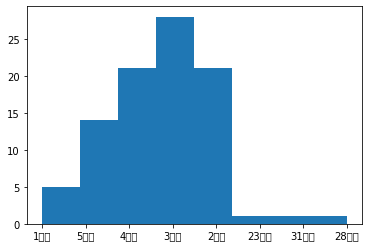

In [26]:

import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.pyplot import figure

_ =plt.hist(df['datetime'], bins='auto')

plt.show()

In [27]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)
#create histogram, get bin position for label
ax.hist(df['datetime'],bins='auto')

#plt.xticks(bins)
plt.xticks(rotation=45)
plt.xlabel('time')
plt.ylabel('reply')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.show()

<Figure size 640x480 with 0 Axes>

ValueError: DateFormatter found a value of x=0, which is an illegal date; this usually occurs because you have not informed the axis that it is plotting dates, e.g., with ax.xaxis_date()

<Figure size 1800x1200 with 1 Axes>